## CANDISC - vins dataset

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")
from great_tables import GT, html
def print_dt(data,title=None,subtitle=None,rowname=None,digits=4):
    dt = (GT(data=data.round(digits).rename_axis(rowname).reset_index())
          .tab_header(title=title, subtitle=subtitle))
    return dt

### vins dataset

In [2]:
#vins dataset
from discrimintools.datasets import load_vins
D = load_vins()
(
    GT(D.head().rename_axis("Année").reset_index())
    .tab_header(title=html("<b>Vins Bordeaux training data</b>"))
)

GT(_tbl_data=   Année  Temperature  Soleil  Chaleur  Pluie   Qualite
0   1924         3064    1201       10    361     Moyen
1   1925         3000    1053       11    338  Mediocre
2   1926         3155    1133       19    393     Moyen
3   1927         3085     970        4    467  Mediocre
4   1928         3245    1258       36    294       Bon, _body=<great_tables._gt_data.Body object at 0x000001B0D4F94BD0>, _boxhead=Boxhead([ColInfo(var='Année', type=<ColInfoTypeEnum.default: 1>, column_label='Année', column_align='right', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None), ColInfo(var='Qualite', type=<ColInfoTypeEnum.default: 1>, column_label='Qualite', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7A126D0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Vins Bordeaux training data</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F91A50>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F93C50>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7F934D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category=

In [3]:
#split into X and y
y, X = D["Qualite"], D.drop(columns=["Qualite"])

### `instanciation & training`

In [4]:
from discrimintools import CANDISC
clf = CANDISC(n_components=2,classes=("Mediocre","Moyen","Bon"))

#### `fit` function

In [5]:
#fit function
clf.fit(X,y)

,n_components,2
,classes,"('Mediocre', ...)"
,warn_message,True


#### `fit_transform` function

In [6]:
#fit_transform function
print_dt(clf.fit_transform(X,y).head(),rowname="Annee",title=html("<b>Individuals coordinates</b>"))

GT(_tbl_data=   Annee    Can1    Can2
0   1924 -0.8826 -0.8715
1   1925 -2.3255 -0.0942
2   1926 -0.9949  0.8330
3   1927 -2.7269  0.2472
4   1928  0.7436  1.7212, _body=<great_tables._gt_data.Body object at 0x000001B0F7F189D0>, _boxhead=Boxhead([ColInfo(var='Annee', type=<ColInfoTypeEnum.default: 1>, column_label='Annee', column_align='right', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7FA0A90>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Individuals coordinates</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F1A150>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F19A90>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F3D91A90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='val

#### `decision_function` function

In [7]:
#decision_function function
print_dt(clf.decision_function(X).head(),rowname="Annee",title=html("<b>Fonction de déçision</b>"))

GT(_tbl_data=   Annee  Mediocre   Moyen      Bon
0   1924   -2.3545 -1.7220  -6.2956
1   1925   -1.1215 -4.2710 -11.0852
2   1926   -1.8165 -2.6855  -6.1432
3   1927   -1.2515 -5.5451 -12.8843
4   1928   -6.1506 -3.8028  -3.1287, _body=<great_tables._gt_data.Body object at 0x000001B0F7F6E750>, _boxhead=Boxhead([ColInfo(var='Annee', type=<ColInfoTypeEnum.default: 1>, column_label='Annee', column_align='right', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7EFEC50>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Fonction de déçision</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F28850>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F29750>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7F295D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type

#### `eval_predict` function

In [8]:
#eval_predict function
eval_train = clf.eval_predict(X,y,verbose=True)

Observation Profile:
                        Read  Used
Number of Observations    34    34

Number of Observations Classified into Qualite:
prediction  Mediocre  Moyen  Bon  Total
Qualite                                
Mediocre          10      2    0     12
Moyen              1      8    2     11
Bon                0      2    9     11
Total             11     12   11     34

Percent Classified into Qualite:
prediction   Mediocre      Moyen        Bon  Total
Qualite                                           
Mediocre    83.333333  16.666667   0.000000  100.0
Moyen        9.090909  72.727273  18.181818  100.0
Bon          0.000000  18.181818  81.818182  100.0
Total       32.352941  35.294118  32.352941  100.0
Priors       0.352941   0.323529   0.323529    NaN

Error Count Estimates for Qualite:
        Mediocre     Moyen       Bon     Total
Rate    0.166667  0.272727  0.181818  0.205882
Priors  0.352941  0.323529  0.323529       NaN

Classification Report for Qualite:
              pr

#### `pred_table` function

In [9]:
#pred_table function
print_dt(clf.pred_table(X,y),rowname="Reference",title=html("<b>Confusion matrix</b>"))

GT(_tbl_data=prediction Reference  Mediocre  Moyen  Bon
0           Mediocre        10      2    0
1              Moyen         1      8    2
2                Bon         0      2    9, _body=<great_tables._gt_data.Body object at 0x000001B0F7EF2CD0>, _boxhead=Boxhead([ColInfo(var='Reference', type=<ColInfoTypeEnum.default: 1>, column_label='Reference', column_align='left', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0D466B890>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Confusion matrix</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7EF2A90>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FC2910>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7FC2B90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_backg

#### `predict` function

In [10]:
#predict function
print_dt(clf.predict(X).to_frame().head(),rowname="Annee",title=html("<b>Prediction</b>"))

GT(_tbl_data=   Annee prediction
0   1924      Moyen
1   1925   Mediocre
2   1926   Mediocre
3   1927   Mediocre
4   1928        Bon, _body=<great_tables._gt_data.Body object at 0x000001B0F7FDC2D0>, _boxhead=Boxhead([ColInfo(var='Annee', type=<ColInfoTypeEnum.default: 1>, column_label='Annee', column_align='right', column_width=None), ColInfo(var='prediction', type=<ColInfoTypeEnum.default: 1>, column_label='prediction', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7FC2710>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Prediction</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FDE8D0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FDDBD0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7FDF2D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsIn

#### `predict_proba` fonction

In [11]:
#predict_proba function
print_dt(clf.predict_proba(X).head(),rowname="Annee",title=html("<b>Predicted probabilities</b>"))

GT(_tbl_data=   Annee  Mediocre   Moyen     Bon
0   1924    0.3446  0.6487  0.0067
1   1925    0.9588  0.0411  0.0000
2   1926    0.6980  0.2927  0.0092
3   1927    0.9865  0.0135  0.0000
4   1928    0.0313  0.3270  0.6417, _body=<great_tables._gt_data.Body object at 0x000001B0F7F1B150>, _boxhead=Boxhead([ColInfo(var='Annee', type=<ColInfoTypeEnum.default: 1>, column_label='Annee', column_align='right', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7FDFF50>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Predicted probabilities</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F11290>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F11B10>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7F11E10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='v

#### `score` function

In [12]:
#score function
print("Accuracy : {}%".format(100*round(clf.score(X,y),2)))

Accuracy : 79.0%


In [13]:
#error rate
print("Error rate : {}%".format(100-100*round(clf.score(X,y),2)))

Error rate : 21.0%


#### `transform` function

In [14]:
#transform function
print_dt(clf.transform(X).head(),rowname="Annee",title=html("<b>Individuals coordinates</b>"))

GT(_tbl_data=   Annee    Can1    Can2
0   1924 -0.8826 -0.8715
1   1925 -2.3255 -0.0942
2   1926 -0.9949  0.8330
3   1927 -2.7269  0.2472
4   1928  0.7436  1.7212, _body=<great_tables._gt_data.Body object at 0x000001B0F7FF2850>, _boxhead=Boxhead([ColInfo(var='Annee', type=<ColInfoTypeEnum.default: 1>, column_label='Annee', column_align='right', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7EF2410>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Individuals coordinates</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FF2510>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FF3190>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7FF0050>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='val

### Discriminant informations

#### Summary Information

In [15]:
#summary information
print_dt(clf.summary_.infos,rowname="",title=html("<b>Summary Information</b>"))

GT(_tbl_data=                  infos  Value                  DF  DF value
0  0  Total Sample Size     34            DF Total        33
1  1          Variables      4   DF Within Classes        31
2  2            Classes      3  DF Between Classes         2, _body=<great_tables._gt_data.Body object at 0x000001B0F7FF8410>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='right', column_width=None), ColInfo(var='infos', type=<ColInfoTypeEnum.default: 1>, column_label='infos', column_align='left', column_width=None), ColInfo(var='Value', type=<ColInfoTypeEnum.default: 1>, column_label='Value', column_align='right', column_width=None), ColInfo(var='DF', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='left', column_width=None), ColInfo(var='DF value', type=<ColInfoTypeEnum.default: 1>, column_label='DF value', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7FF2F90>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Summary Information</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FFA410>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FFA450>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7FFA490>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=Op

#### Class Level Informations

In [16]:
#class level information
print_dt(clf.classes_.infos,rowname="",title=html("<b>Class Level Information</b>"))

GT(_tbl_data=             Frequency  Proportion  Prior Probability
0  Mediocre         12      0.3529             0.3529
1     Moyen         11      0.3235             0.3235
2       Bon         11      0.3235             0.3235, _body=<great_tables._gt_data.Body object at 0x000001B0F7F32FD0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Frequency', type=<ColInfoTypeEnum.default: 1>, column_label='Frequency', column_align='right', column_width=None), ColInfo(var='Proportion', type=<ColInfoTypeEnum.default: 1>, column_label='Proportion', column_align='right', column_width=None), ColInfo(var='Prior Probability', type=<ColInfoTypeEnum.default: 1>, column_label='Prior Probability', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7FFAF50>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Class Level Information</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F8009710>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F8008790>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F8009690>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(s

### Sum of Squared Cross Product

#### Within-Class SSCP Matrices

In [17]:
#Within-Class SSCP Matrices
print("\nWithin-Class SSCP Matrices:")
for k in clf.sscp_.within.keys():
    print("\n{} = {}".format(clf.call_.target,k))
    print(clf.sscp_.within[k].round(3))


Within-Class SSCP Matrices:

Qualite = Mediocre
             Temperature     Soleil   Chaleur       Pluie
Temperature    52886.667 -11039.667  2568.667    2497.667
Soleil        -11039.667  85946.917  1731.583    -657.667
Chaleur         2568.667   1731.583   436.917    -281.333
Pluie           2497.667   -657.667  -281.333  120918.667

Qualite = Moyen
             Temperature     Soleil   Chaleur      Pluie
Temperature   100090.909  35415.909  5879.455  37930.636
Soleil         35415.909  51754.909  1882.455   9120.636
Chaleur         5879.455   1882.455   452.727   2262.818
Pluie          37930.636   9120.636  2262.818  30234.545

Qualite = Bon
             Temperature     Soleil   Chaleur    Pluie
Temperature    84744.545  33908.455  5852.818 -27091.0
Soleil         33908.455  64490.545  1631.182 -13361.0
Chaleur         5852.818   1631.182   774.727  -3061.0
Pluie         -27091.000 -13361.000 -3061.000  27346.0


#### Pooled Within-Class SSCP Matrix

In [18]:
#Pooled Within-Class SSCP Matrix
print_dt(clf.sscp_.pooled,rowname="",title=html("<b>Pooled Within-Class SSCP Matrix</b>"))

GT(_tbl_data=                Temperature       Soleil     Chaleur        Pluie
0  Temperature  237722.1212   58284.6970  14300.9394   13337.3030
1       Soleil   58284.6970  202192.3712   5245.2197   -4898.0303
2      Chaleur   14300.9394    5245.2197   1664.3712   -1079.5152
3        Pluie   13337.3030   -4898.0303  -1079.5152  178499.2121, _body=<great_tables._gt_data.Body object at 0x000001B0F7FDD790>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7F24890>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Pooled Within-Class SSCP Matrix</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FDCC50>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FDFD90>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0D467D510>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), tab

#### Between-Class SSCP Matrix

In [19]:
#Between-Class SSCP Matrix
print_dt(clf.sscp_.between,rowname="",title=html("<b>Between SSCP Matrix</b>"))

GT(_tbl_data=                Temperature       Soleil     Chaleur        Pluie
0  Temperature  420067.4082  361965.5971  26071.3547 -187772.5383
1       Soleil  361965.5971  326909.0700  21811.7215 -175905.8226
2      Chaleur   26071.3547   21811.7215   1646.5700  -11039.8378
3        Pluie -187772.5383 -175905.8226 -11039.8378   97191.1702, _body=<great_tables._gt_data.Body object at 0x000001B0F800E710>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F800B990>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Between SSCP Matrix</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F800CA10>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F800E690>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F800E7D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_le

#### Total-Sample SSCP Matrix

In [20]:
#Total-Sample SSCP Matrix
print_dt(clf.sscp_.total,rowname="",title=html("<b>Total-Sample SSCP Matrix</b>"))

GT(_tbl_data=                Temperature       Soleil     Chaleur        Pluie
0  Temperature  657789.5294  420250.2941  40372.2941 -174435.2353
1       Soleil  420250.2941  529101.4412  27056.9412 -180803.8529
2      Chaleur   40372.2941   27056.9412   3310.9412  -12119.3529
3        Pluie -174435.2353 -180803.8529 -12119.3529  275690.3824, _body=<great_tables._gt_data.Body object at 0x000001B0F80105D0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7F11650>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Total-Sample SSCP Matrix</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F80101D0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F8011D10>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F8012210>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_bord

### Covariance matrices

#### Within-Class Covariance Matrices

In [21]:
#Within-Class Covariance Matrices
print("\nWithin-Class Covariance Matrices:")
for k in clf.cov_.within.keys():
    print("\n{} = {}, DF = {}".format(clf.call_.target,k,clf.classes_.infos.loc[k,"Frequency"]-1))
    print(clf.cov_.within[k].round(3))


Within-Class Covariance Matrices:

Qualite = Mediocre, DF = 11
             Temperature    Soleil  Chaleur      Pluie
Temperature     4807.879 -1003.606  233.515    227.061
Soleil         -1003.606  7813.356  157.417    -59.788
Chaleur          233.515   157.417   39.720    -25.576
Pluie            227.061   -59.788  -25.576  10992.606

Qualite = Moyen, DF = 10
             Temperature    Soleil  Chaleur     Pluie
Temperature    10009.091  3541.591  587.945  3793.064
Soleil          3541.591  5175.491  188.245   912.064
Chaleur          587.945   188.245   45.273   226.282
Pluie           3793.064   912.064  226.282  3023.455

Qualite = Bon, DF = 10
             Temperature    Soleil  Chaleur   Pluie
Temperature     8474.455  3390.845  585.282 -2709.1
Soleil          3390.845  6449.055  163.118 -1336.1
Chaleur          585.282   163.118   77.473  -306.1
Pluie          -2709.100 -1336.100 -306.100  2734.6


#### Pooled Within-Class Covariance Matrix

In [22]:
#Pooled Within-Class Covariance Matrix
print_dt(clf.cov_.pooled,rowname="Variables",title=html("<b>Pooled Within-Class Covariance Matrix, DF = {}</b>".format(clf.summary_.infos.iloc[1,3])))

GT(_tbl_data=     Variables  Temperature     Soleil   Chaleur      Pluie
0  Temperature    7668.4555  1880.1515  461.3206   430.2356
1       Soleil    1880.1515  6522.3346  169.2006  -158.0010
2      Chaleur     461.3206   169.2006   53.6894   -34.8231
3        Pluie     430.2356  -158.0010  -34.8231  5758.0391, _body=<great_tables._gt_data.Body object at 0x000001B0FA025490>, _boxhead=Boxhead([ColInfo(var='Variables', type=<ColInfoTypeEnum.default: 1>, column_label='Variables', column_align='left', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA026650>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Pooled Within-Class Covariance Matrix, DF = 31</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA025DD0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA027ED0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA025D90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), 

#### Between-Class Covariance Matrix

In [23]:
#Between-Class Covariance Matrix
print_dt(clf.cov_.between,rowname="Variables",title=html("<b>Between-Class Covariance Matrix, DF = {}</b>".format(clf.summary_.infos.iloc[2,3])))

GT(_tbl_data=     Variables  Temperature      Soleil    Chaleur      Pluie
0  Temperature   18532.3857  15969.0705  1150.2068 -8284.0826
1       Soleil   15969.0705  14422.4590   962.2818 -7760.5510
2      Chaleur    1150.2068    962.2818    72.6428  -487.0517
3        Pluie   -8284.0826  -7760.5510  -487.0517  4287.8457, _body=<great_tables._gt_data.Body object at 0x000001B0FA02C050>, _boxhead=Boxhead([ColInfo(var='Variables', type=<ColInfoTypeEnum.default: 1>, column_label='Variables', column_align='left', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA025610>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Between-Class Covariance Matrix, DF = 2</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA02D810>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA02DBD0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA02DB90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'

#### Total-Sample Covariance Matrix

In [24]:
#Total-Sample Covariance Matrix
print_dt(clf.cov_.total,rowname="Variables",title=html("<b>Total-Sample Covariance Matrix, DF = {}</b>".format(clf.summary_.infos.iloc[0,3])))

GT(_tbl_data=     Variables  Temperature      Soleil    Chaleur      Pluie
0  Temperature   19933.0160  12734.8574  1223.4029 -5285.9162
1       Soleil   12734.8574  16033.3770   819.9073 -5478.9046
2      Chaleur    1223.4029    819.9073   100.3316  -367.2531
3        Pluie   -5285.9162  -5478.9046  -367.2531  8354.2540, _body=<great_tables._gt_data.Body object at 0x000001B0FA02D250>, _boxhead=Boxhead([ColInfo(var='Variables', type=<ColInfoTypeEnum.default: 1>, column_label='Variables', column_align='left', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F800FED0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Total-Sample Covariance Matrix, DF = 33</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA031750>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA030410>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA030BD0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'

### Correlation coefficients

#### Within-Class Correlation Coefficients

In [25]:
#Within-Class Correlation Coefficients
print("\nWithin-Class Correlation Coefficients/Pr>|r|")
for k in clf.corr_.within.keys():
    print("\n{} = {}".format(clf.call_.target,k))
    print(clf.corr_.within[k].round(3))


Within-Class Correlation Coefficients/Pr>|r|

Qualite = Mediocre
     Variable1 Variable2      R  t value  DF  Pr>|t|       Conclusion
0  Temperature    Soleil -0.164   -0.525  10   0.611  Non-significant
1  Temperature   Chaleur  0.534    1.999  10   0.073  Non-significant
2  Temperature     Pluie  0.031    0.099  10   0.923  Non-significant
3       Soleil   Chaleur  0.283    0.932  10   0.374  Non-significant
4       Soleil     Pluie -0.006   -0.020  10   0.984  Non-significant
5      Chaleur     Pluie -0.039   -0.122  10   0.905  Non-significant

Qualite = Moyen
     Variable1 Variable2      R  t value  DF  Pr>|t|       Conclusion
0  Temperature    Soleil  0.492    1.696   9   0.124  Non-significant
1  Temperature   Chaleur  0.873    5.381   9   0.000      Significant
2  Temperature     Pluie  0.690    2.856   9   0.019      Significant
3       Soleil   Chaleur  0.389    1.266   9   0.237  Non-significant
4       Soleil     Pluie  0.231    0.711   9   0.495  Non-significant
5      

#### Pooled Within-Class Correlation Coefficients/Pr>|r|

In [26]:
#Pooled Within-Class Correlation Coefficients/Pr>|r|
print_dt(clf.corr_.pooled,rowname="",title=html("<b>Pooled Within-Class Correlation Coefficients/Pr>|r|</b>"))

GT(_tbl_data=        Variable1 Variable2       R  t value  DF  Pr>|t|       Conclusion
0  0  Temperature    Soleil  0.2659   1.5105  30  0.1414  Non-significant
1  1  Temperature   Chaleur  0.7190   5.6656  30  0.0000      Significant
2  2  Temperature     Pluie  0.0647   0.3554  30  0.7248  Non-significant
3  3       Soleil   Chaleur  0.2859   1.6343  30  0.1126  Non-significant
4  4       Soleil     Pluie -0.0258  -0.1413  30  0.8886  Non-significant
5  5      Chaleur     Pluie -0.0626  -0.3437  30  0.7335  Non-significant, _body=<great_tables._gt_data.Body object at 0x000001B0FA0333D0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='right', column_width=None), ColInfo(var='Variable1', type=<ColInfoTypeEnum.default: 1>, column_label='Variable1', column_align='left', column_width=None), ColInfo(var='Variable2', type=<ColInfoTypeEnum.default: 1>, column_label='Variable2', column_align='left', column_width=None), ColInfo(var='R', type=<ColInfoTypeEnum.default: 1>, column_label='R', column_align='right', column_width=None), ColInfo(var='t value', type=<ColInfoTypeEnum.default: 1>, column_label='t value', column_align='right', column_width=None), ColInfo(var='DF', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='Pr>|t|', type=<ColInfoTypeEnum.default: 1>, column_label='Pr>|t|', column_align='right', column_width=None), ColInfo(var='Conclusion', type=<ColInfoTypeEnum.default: 1>, column_label='Conclusion', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7F1A550>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Pooled Within-Class Correlation Coefficients/Pr>|r|</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA03EBD0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA03EC50>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA03C7D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_

#### Between-Class Correlation Coefficients/Pr>|r|

In [27]:
#Between-Class Correlation Coefficients/Pr>|r|
print_dt(clf.corr_.between,rowname="",title=html("<b>Between-Class Correlation Coefficients/Pr>|r|</b>"))

GT(_tbl_data=        Variable1 Variable2       R  t value  DF  Pr>|t|       Conclusion
0  0  Temperature    Soleil  0.9768   4.5586   1  0.1375  Non-significant
1  1  Temperature   Chaleur  0.9913   7.5404   1  0.0839  Non-significant
2  2  Temperature     Pluie -0.9293  -2.5163   1  0.2408  Non-significant
3  3       Soleil   Chaleur  0.9401   2.7584   1  0.2214  Non-significant
4  4       Soleil     Pluie -0.9869  -6.1065   1  0.1033  Non-significant
5  5      Chaleur     Pluie -0.8727  -1.7873   1  0.3247  Non-significant, _body=<great_tables._gt_data.Body object at 0x000001B0F7FF0BD0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='right', column_width=None), ColInfo(var='Variable1', type=<ColInfoTypeEnum.default: 1>, column_label='Variable1', column_align='left', column_width=None), ColInfo(var='Variable2', type=<ColInfoTypeEnum.default: 1>, column_label='Variable2', column_align='left', column_width=None), ColInfo(var='R', type=<ColInfoTypeEnum.default: 1>, column_label='R', column_align='right', column_width=None), ColInfo(var='t value', type=<ColInfoTypeEnum.default: 1>, column_label='t value', column_align='right', column_width=None), ColInfo(var='DF', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='Pr>|t|', type=<ColInfoTypeEnum.default: 1>, column_label='Pr>|t|', column_align='right', column_width=None), ColInfo(var='Conclusion', type=<ColInfoTypeEnum.default: 1>, column_label='Conclusion', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA0324D0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Between-Class Correlation Coefficients/Pr>|r|</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0494D0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA049750>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA048CD0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_

#### Total-Sample Correlation Coefficients/Pr>|r|

In [28]:
#Total-Sample Correlation Coefficients/Pr>|r|
print_dt(clf.corr_.total,rowname="",title=html("<>Total-Sample Correlation Coefficients/Pr>|r|</b>"))

GT(_tbl_data=        Variable1 Variable2       R  t value  DF  Pr>|t|   Conclusion
0  0  Temperature    Soleil  0.7124   5.7417  32  0.0000  Significant
1  1  Temperature   Chaleur  0.8651   9.7561  32  0.0000  Significant
2  2  Temperature     Pluie -0.4096  -2.5400  32  0.0161  Significant
3  3       Soleil   Chaleur  0.6464   4.7930  32  0.0000  Significant
4  4       Soleil     Pluie -0.4734  -3.0402  32  0.0047  Significant
5  5      Chaleur     Pluie -0.4011  -2.4772  32  0.0187  Significant, _body=<great_tables._gt_data.Body object at 0x000001B0F7FC2FD0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='right', column_width=None), ColInfo(var='Variable1', type=<ColInfoTypeEnum.default: 1>, column_label='Variable1', column_align='left', column_width=None), ColInfo(var='Variable2', type=<ColInfoTypeEnum.default: 1>, column_label='Variable2', column_align='left', column_width=None), ColInfo(var='R', type=<ColInfoTypeEnum.default: 1>, column_label='R', column_align='right', column_width=None), ColInfo(var='t value', type=<ColInfoTypeEnum.default: 1>, column_label='t value', column_align='right', column_width=None), ColInfo(var='DF', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='Pr>|t|', type=<ColInfoTypeEnum.default: 1>, column_label='Pr>|t|', column_align='right', column_width=None), ColInfo(var='Conclusion', type=<ColInfoTypeEnum.default: 1>, column_label='Conclusion', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA04B650>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<>Total-Sample Correlation Coefficients/Pr>|r|</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA05CE10>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA05CFD0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA05DB10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, c

### Simple Statistics

#### Total statistics

In [29]:
#total statistics
print_dt(clf.summary_.total,rowname="Variable",title=html("<b>Total statistic</b>"))

GT(_tbl_data=      Variable  count       mean       std     min      25%     50%      75%  \
0  Temperature     34  3157.8824  141.1843  2904.0  3045.25  3140.5  3250.75   
1       Soleil     34  1247.3235  126.6230   966.0  1177.75  1253.0  1330.50   
2      Chaleur     34    18.8235   10.0166     4.0    11.25    16.5    24.75   
3        Pluie     34   360.4412   91.4016   225.0   302.25   342.5   408.75   

      max  
0  3478.0  
1  1508.0  
2    43.0  
3   677.0  , _body=<great_tables._gt_data.Body object at 0x000001B0FA065C90>, _boxhead=Boxhead([ColInfo(var='Variable', type=<ColInfoTypeEnum.default: 1>, column_label='Variable', column_align='left', column_width=None), ColInfo(var='count', type=<ColInfoTypeEnum.default: 1>, column_label='count', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='25%', type=<ColInfoTypeEnum.default: 1>, column_label='25%', column_align='right', column_width=None), ColInfo(var='50%', type=<ColInfoTypeEnum.default: 1>, column_label='50%', column_align='right', column_width=None), ColInfo(var='75%', type=<ColInfoTypeEnum.default: 1>, column_label='75%', column_align='right', column_width=None), ColInfo(var='max', type=<ColInfoTypeEnum.default: 1>, column_label='max', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA024450>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Total statistic</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA065E10>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA065D10>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA065FD0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border

#### Within-class statistics

In [30]:
#whitin-class statistics
print("\nwhitin-class statistics")
for k in clf.summary_.within.keys():
    print("\n{}".format(k))
    print(clf.summary_.within[k].round(3))


whitin-class statistics

Mediocre
             count      mean      std     min      25%     50%      75%  \
Temperature     12  3037.333   69.339  2904.0  2999.50  3040.5  3080.75   
Soleil          12  1126.417   88.393   966.0  1089.75  1167.5  1190.50   
Chaleur         12    12.083    6.302     4.0     8.25    12.5    14.00   
Pluie           12   430.333  104.846   311.0   346.25   429.0   472.25   

                max  
Temperature  3182.0  
Soleil       1210.0  
Chaleur        28.0  
Pluie         677.0  

Moyen
             count      mean      std     min     25%     50%     75%     max
Temperature     11  3140.909  100.045  3019.0  3062.5  3126.0  3219.5  3318.0
Soleil          11  1262.909   71.941  1133.0  1215.5  1285.0  1319.5  1361.0
Chaleur         11    16.455    6.729     9.0    11.0    16.0    20.0    29.0
Pluie           11   339.636   54.986   261.0   302.5   339.0   377.0   427.0

Bon
             count      mean     std     min     25%     50%     75%     max


### Class means

#### Total-sample class means

In [31]:
#total-sample class means
print_dt(clf.classes_.center.T,rowname="{}".format(clf.call_.target),title=html("<b>Total-sample class means</b>"))

GT(_tbl_data=       Qualite   Mediocre      Moyen        Bon
0  Temperature  3037.3333  3140.9091  3306.3636
1       Soleil  1126.4167  1262.9091  1363.6364
2      Chaleur    12.0833    16.4545    28.5455
3        Pluie   430.3333   339.6364   305.0000, _body=<great_tables._gt_data.Body object at 0x000001B0FA06E610>, _boxhead=Boxhead([ColInfo(var='Qualite', type=<ColInfoTypeEnum.default: 1>, column_label='Qualite', column_align='left', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA06E890>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Total-sample class means</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA06D4D0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA06E050>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA06E710>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(sc

#### Total-Sample Standardized Class Means

In [32]:
#Total-Sample Standardized Class Means
print_dt(clf.classes_.total,rowname="{}".format(clf.call_.target),title=html("<b>Total-Sample Standardized Class Means</b>"))

GT(_tbl_data=       Qualite  Mediocre   Moyen     Bon
0  Temperature   -0.8538 -0.1202  1.0517
1       Soleil   -0.9549  0.1231  0.9186
2      Chaleur   -0.6729 -0.2365  0.9706
3        Pluie    0.7647 -0.2276 -0.6066, _body=<great_tables._gt_data.Body object at 0x000001B0F8010A90>, _boxhead=Boxhead([ColInfo(var='Qualite', type=<ColInfoTypeEnum.default: 1>, column_label='Qualite', column_align='left', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA067CD0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Total-Sample Standardized Class Means</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA078050>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA079510>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA079350>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='tab

#### Pooled-Within Class Standardized Class Means

In [33]:

print_dt(clf.classes_.pooled,rowname="{}".format(clf.call_.target),title=html("<b>Pooled-Within Class Standardized Class Means</b>"))

GT(_tbl_data=       Qualite  Mediocre   Moyen     Bon
0  Temperature   -1.3766 -0.1938  1.6956
1       Soleil   -1.4971  0.1930  1.4402
2      Chaleur   -0.9199 -0.3233  1.3268
3        Pluie    0.9211 -0.2742 -0.7306, _body=<great_tables._gt_data.Body object at 0x000001B0FA0798D0>, _boxhead=Boxhead([ColInfo(var='Qualite', type=<ColInfoTypeEnum.default: 1>, column_label='Qualite', column_align='left', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7EF1110>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Pooled-Within Class Standardized Class Means</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA07BB10>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA07BB50>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA07BCD0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, catego

#### Squared Distances to Qualite

In [34]:
#squared distances to Qualite
print_dt(clf.classes_.mahal.round(3),rowname="{}".format(clf.call_.target),title=html("<b>Squared Distance to {}</b>".format(clf.call_.target)))

GT(_tbl_data=    Qualite  Mediocre  Moyen     Bon
0  Mediocre     0.000  5.492  17.653
1     Moyen     5.492  0.000   4.519
2       Bon    17.653  4.519   0.000, _body=<great_tables._gt_data.Body object at 0x000001B0FA084B50>, _boxhead=Boxhead([ColInfo(var='Qualite', type=<ColInfoTypeEnum.default: 1>, column_label='Qualite', column_align='left', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA0793D0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Squared Distance to Qualite</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA084B10>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0844D0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA084390>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=Optio

#### Generalized Squared distance to Qualite

In [35]:
#generalized squared distance to Qualite
print_dt(clf.classes_.gen.round(3),rowname="{}".format(clf.call_.target),title=html("<b>Generalized Distance to {}</b>".format(clf.call_.target)))

GT(_tbl_data=    Qualite  Mediocre  Moyen     Bon
0  Mediocre     2.083  7.749  19.910
1     Moyen     7.575  2.257   6.776
2       Bon    19.736  6.776   2.257, _body=<great_tables._gt_data.Body object at 0x000001B0FA087550>, _boxhead=Boxhead([ColInfo(var='Qualite', type=<ColInfoTypeEnum.default: 1>, column_label='Qualite', column_align='left', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA089290>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Generalized Distance to Qualite</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0855D0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA087590>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA087750>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=O

### Statistics

#### Univariate Test Statistics

In [36]:
#Univariate Test Statistics
print_dt(clf.statistics_.anova,rowname="Variables",title=html("<b>Univariate Test Statistics</b>"))

GT(_tbl_data=     Variables  Total Std. Dev.  Pooled Std. Dev.  Between Std. Dev.  \
0  Temperature         141.1843           87.5697           136.1337   
1       Soleil         126.6230           80.7610           120.0935   
2      Chaleur          10.0166            7.3273             8.5231   
3        Pluie          91.4016           75.8817            65.4816   

     Within SS   Between SS  R-Square  R-Square/(1-RSq)  F Value  Num DF  \
0  237722.1212  420067.4082    0.6386            1.7671  27.3893       2   
1  202192.3712  326909.0700    0.6179            1.6168  25.0607       2   
2    1664.3712    1646.5700    0.4973            0.9893  15.3342       2   
3  178499.2121   97191.1702    0.3525            0.5445   8.4396       2   

   Den DF    Pr>F  
0      31  0.0000  
1      31  0.0000  
2      31  0.0000  
3      31  0.0012  , _body=<great_tables._gt_data.Body object at 0x000001B0FA09C250>, _boxhead=Boxhead([ColInfo(var='Variables', type=<ColInfoTypeEnum.default: 1>, column_label='Variables', column_align='left', column_width=None), ColInfo(var='Total Std. Dev.', type=<ColInfoTypeEnum.default: 1>, column_label='Total Std. Dev.', column_align='right', column_width=None), ColInfo(var='Pooled Std. Dev.', type=<ColInfoTypeEnum.default: 1>, column_label='Pooled Std. Dev.', column_align='right', column_width=None), ColInfo(var='Between Std. Dev.', type=<ColInfoTypeEnum.default: 1>, column_label='Between Std. Dev.', column_align='right', column_width=None), ColInfo(var='Within SS', type=<ColInfoTypeEnum.default: 1>, column_label='Within SS', column_align='right', column_width=None), ColInfo(var='Between SS', type=<ColInfoTypeEnum.default: 1>, column_label='Between SS', column_align='right', column_width=None), ColInfo(var='R-Square', type=<ColInfoTypeEnum.default: 1>, column_label='R-Square', column_align='right', column_width=None), ColInfo(var='R-Square/(1-RSq)', type=<ColInfoTypeEnum.default: 1>, column_label='R-Square/(1-RSq)', column_align='right', column_width=None), ColInfo(var='F Value', type=<ColInfoTypeEnum.default: 1>, column_label='F Value', column_align='right', column_width=None), ColInfo(var='Num DF', type=<ColInfoTypeEnum.default: 1>, column_label='Num DF', column_align='right', column_width=None), ColInfo(var='Den DF', type=<ColInfoTypeEnum.default: 1>, column_label='Den DF', column_align='right', column_width=None), ColInfo(var='Pr>F', type=<ColInfoTypeEnum.default: 1>, column_label='Pr>F', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7FDD6D0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Univariate Test Statistics</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA09C310>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA09C350>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA09C390>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss

#### Average R-square

In [37]:
#Average R-square
print_dt(clf.statistics_.average_rsq,rowname="",title=html("<b>Average R-square</b>"))

GT(_tbl_data=                     Unweighted  Weighted by Variance
0  Average R-Square      0.5266                 0.577, _body=<great_tables._gt_data.Body object at 0x000001B0FA09C4D0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Unweighted', type=<ColInfoTypeEnum.default: 1>, column_label='Unweighted', column_align='right', column_width=None), ColInfo(var='Weighted by Variance', type=<ColInfoTypeEnum.default: 1>, column_label='Weighted by Variance', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA03FFD0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Average R-square</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA09D050>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA09CF50>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA09D350>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='cent

#### Multivariate Statistics and F Approximations

In [38]:
#Multivariate Statistics and F Approximations
print_dt(clf.statistics_.manova,rowname="Statistics",title=html("<b>Multivariate Statistics and F Approximations</b>"))

GT(_tbl_data=               Statistics     Value Num DF Den DF    F Value   Pr > F
0           Wilks' lambda  0.205263      8   56.0   8.450507      0.0
1          Pillai's trace  0.888001    8.0   58.0   5.789584  0.00002
2  Hotelling-Lawley trace  3.417435      8  37.75  11.728014      0.0
3     Roy's greatest root   3.27886      4     29  23.771739      0.0, _body=<great_tables._gt_data.Body object at 0x000001B0FA0AC450>, _boxhead=Boxhead([ColInfo(var='Statistics', type=<ColInfoTypeEnum.default: 1>, column_label='Statistics', column_align='left', column_width=None), ColInfo(var='Value', type=<ColInfoTypeEnum.default: 1>, column_label='Value', column_align='right', column_width=None), ColInfo(var='Num DF', type=<ColInfoTypeEnum.default: 1>, column_label='Num DF', column_align='right', column_width=None), ColInfo(var='Den DF', type=<ColInfoTypeEnum.default: 1>, column_label='Den DF', column_align='right', column_width=None), ColInfo(var='F Value', type=<ColInfoTypeEnum.default: 1>, column_label='F Value', column_align='right', column_width=None), ColInfo(var='Pr > F', type=<ColInfoTypeEnum.default: 1>, column_label='Pr > F', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA09E390>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Multivariate Statistics and F Approximations</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0ACAD0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0ADCD0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA0ADC90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=Opt

### Canonical Informations

#### Canonical correlations

In [39]:
#canonical correlations
print_dt(clf.cancorr_,rowname="",title=html("<b>Canonical correlations</b>"))

GT(_tbl_data=      Canonical Correlation  Squared Canonical Correlation  Likelihood Ratio  \
0  0                 0.8754                         0.7663            0.2053   
1  1                 0.3489                         0.1217            0.8783   

   Approximate F value  Num DF  Den DF    Pr>F  Chi-Square  DF  Pr>Chi2  
0               8.4505       8      56  0.0000     46.7122   8   0.0000  
1               1.3395       3      29  0.2808      3.8284   3   0.2806  , _body=<great_tables._gt_data.Body object at 0x000001B0F7F293D0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='right', column_width=None), ColInfo(var='Canonical Correlation', type=<ColInfoTypeEnum.default: 1>, column_label='Canonical Correlation', column_align='right', column_width=None), ColInfo(var='Squared Canonical Correlation', type=<ColInfoTypeEnum.default: 1>, column_label='Squared Canonical Correlation', column_align='right', column_width=None), ColInfo(var='Likelihood Ratio', type=<ColInfoTypeEnum.default: 1>, column_label='Likelihood Ratio', column_align='right', column_width=None), ColInfo(var='Approximate F value', type=<ColInfoTypeEnum.default: 1>, column_label='Approximate F value', column_align='right', column_width=None), ColInfo(var='Num DF', type=<ColInfoTypeEnum.default: 1>, column_label='Num DF', column_align='right', column_width=None), ColInfo(var='Den DF', type=<ColInfoTypeEnum.default: 1>, column_label='Den DF', column_align='right', column_width=None), ColInfo(var='Pr>F', type=<ColInfoTypeEnum.default: 1>, column_label='Pr>F', column_align='right', column_width=None), ColInfo(var='Chi-Square', type=<ColInfoTypeEnum.default: 1>, column_label='Chi-Square', column_align='right', column_width=None), ColInfo(var='DF', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='Pr>Chi2', type=<ColInfoTypeEnum.default: 1>, column_label='Pr>Chi2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7EFDD10>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Canonical correlations</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F29010>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F28ED0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7F28D90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean',

#### Canonical eigenvalues

In [40]:
print_dt(clf.eig_,rowname="Dimension",title=html("<b>Canonical eigenvalues</b>"))

GT(_tbl_data=  Dimension  Eigenvalue  Difference  Proportion  Cumulative
0      Can1      3.2789      3.1403     95.9451     95.9451
1      Can2      0.1386         NaN      4.0549    100.0000, _body=<great_tables._gt_data.Body object at 0x000001B0F7F119D0>, _boxhead=Boxhead([ColInfo(var='Dimension', type=<ColInfoTypeEnum.default: 1>, column_label='Dimension', column_align='left', column_width=None), ColInfo(var='Eigenvalue', type=<ColInfoTypeEnum.default: 1>, column_label='Eigenvalue', column_align='right', column_width=None), ColInfo(var='Difference', type=<ColInfoTypeEnum.default: 1>, column_label='Difference', column_align='right', column_width=None), ColInfo(var='Proportion', type=<ColInfoTypeEnum.default: 1>, column_label='Proportion', column_align='right', column_width=None), ColInfo(var='Cumulative', type=<ColInfoTypeEnum.default: 1>, column_label='Cumulative', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7EF6A50>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Canonical eigenvalues</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F13610>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F11D90>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7F11D10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=Optio

### Canoncial structure

#### Total canonical structure

In [41]:
#total canonical structure
print_dt(clf.var_.total,rowname="Variables",title=html("<b>Total Canonical Structure</b>"))

GT(_tbl_data=     Variables    Can1    Can2
0  Temperature  0.9006  0.3748
1       Soleil  0.8967 -0.1162
2      Chaleur  0.7705  0.5900
3        Pluie -0.6628  0.3613, _body=<great_tables._gt_data.Body object at 0x000001B0F7F2D8D0>, _boxhead=Boxhead([ColInfo(var='Variables', type=<ColInfoTypeEnum.default: 1>, column_label='Variables', column_align='left', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7F9CFD0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Total Canonical Structure</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F2CF90>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0869D0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7FACD10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='headi

#### Between canonical structure

In [42]:
#between canonical structure
print_dt(clf.var_.between,rowname="Variables",title=html("<b>Between Canonical Structure</b>"))

GT(_tbl_data=     Variables    Can1    Can2
0  Temperature  0.9865  0.1636
1       Soleil  0.9987 -0.0516
2      Chaleur  0.9565  0.2919
3        Pluie -0.9772  0.2123, _body=<great_tables._gt_data.Body object at 0x000001B0F7FBDF10>, _boxhead=Boxhead([ColInfo(var='Variables', type=<ColInfoTypeEnum.default: 1>, column_label='Variables', column_align='left', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7BE0E90>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Between Canonical Structure</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FBCDD0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FBF3D0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7FBF750>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='hea

#### Pooled within-class canonical structure

In [43]:
#Pooled within-class canonical structure
print_dt(clf.var_.pooled,rowname="Variable",title=html("<b>Pooled Within Canonical Structure</b>"))

GT(_tbl_data=      Variable    Can1    Can2
0  Temperature  0.7242  0.5843
1       Soleil  0.7013 -0.1761
2      Chaleur  0.5254  0.7799
3        Pluie -0.3982  0.4208, _body=<great_tables._gt_data.Body object at 0x000001B0F7EF31D0>, _boxhead=Boxhead([ColInfo(var='Variable', type=<ColInfoTypeEnum.default: 1>, column_label='Variable', column_align='left', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7F0A8D0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Pooled Within Canonical Structure</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7EF2790>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7EF2750>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7EF3B50>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category=

### Canonical coefficients

#### Raw canonical coefficients

In [44]:
#raw canonical correlations
print_dt(clf.cancoef_.raw,rowname="",title=html("<b>Canonical coefficients</b>"))

GT(_tbl_data=                   Can1    Can2
0     Constant -32.8763  2.1653
1  Temperature   0.0086 -0.0000
2       Soleil   0.0068 -0.0053
3      Chaleur  -0.0271  0.1276
4        Pluie  -0.0059  0.0062, _body=<great_tables._gt_data.Body object at 0x000001B0F7F51590>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7F1A910>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Canonical coefficients</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F533D0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F510D0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7F537D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True,

#### Total Sample Standardized Canonical Coefficients

In [45]:
#Total Sample Standardized Canonical Coefficients
print_dt(clf.cancoef_.total,rowname="",title=html("<b>Total Sample Standardized Canonical Coefficients</b>"))

GT(_tbl_data=                  Can1    Can2
0  Temperature  1.2094 -0.0065
1       Soleil  0.8577 -0.6748
2      Chaleur -0.2710  1.2785
3        Pluie -0.5361  0.5644, _body=<great_tables._gt_data.Body object at 0x000001B0FA02F490>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F800CED0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Total Sample Standardized Canonical Coefficients</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA02E690>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA02F250>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA02EA50>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='

#### Pooled Within class Standardized Canonical Coefficients

In [46]:
#Pooled Within class Standardized Canonical Coefficients
print_dt(clf.cancoef_.pooled,rowname="",title=html("<b>Pooled Within class Standardized Canonical Coefficients</b>"))

GT(_tbl_data=                  Can1    Can2
0  Temperature  0.7501 -0.0041
1       Soleil  0.5471 -0.4304
2      Chaleur -0.1982  0.9352
3        Pluie -0.4451  0.4685, _body=<great_tables._gt_data.Body object at 0x000001B0F800FC50>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7FA1B90>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Pooled Within class Standardized Canonical Coefficients</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FDED50>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7FDECD0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7FDDF10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, cat

### Class Means on Canonical Variables

In [47]:
#Class Means on Canonical Variables
print_dt(clf.classes_.coord,rowname="{}".format(clf.call_.target),title=html("<b>Class Means on Canonical Variables</b>"))

GT(_tbl_data=    Qualite    Can1    Can2
0  Mediocre -2.0792  0.2212
1     Moyen  0.1463 -0.5131
2       Bon  2.1220  0.2718, _body=<great_tables._gt_data.Body object at 0x000001B0F80134D0>, _boxhead=Boxhead([ColInfo(var='Qualite', type=<ColInfoTypeEnum.default: 1>, column_label='Qualite', column_align='left', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA03C910>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Class Means on Canonical Variables</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F30FD0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0F7F30190>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0F7F33D90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), he

### `summary`

In [48]:
from discrimintools import summaryCANDISC

#### Simple summary

In [49]:
#simple summary
summaryCANDISC(clf)

                     Canonical Discriminant Analysis - Results                     

Summary Information:
               infos  Value                  DF  DF value
0  Total Sample Size     34            DF Total        33
1          Variables      4   DF Within Classes        31
2            Classes      3  DF Between Classes         2

Class Level Information:
          Frequency  Proportion  Prior Probability
Mediocre         12      0.3529             0.3529
Moyen            11      0.3235             0.3235
Bon              11      0.3235             0.3235

Total-Sample Class Means:
              Mediocre      Moyen        Bon
Temperature  3037.3333  3140.9091  3306.3636
Soleil       1126.4167  1262.9091  1363.6364
Chaleur        12.0833    16.4545    28.5455
Pluie         430.3333   339.6364   305.0000

Importance of components:
      Eigenvalue  Difference  Proportion  Cumulative
Can1      3.2789      3.1403     95.9451     95.9451
Can2      0.1386         NaN      4.0549    100

#### Detailed summary

In [50]:
#detailed summary
summaryCANDISC(clf,detailed=True)

                     Canonical Discriminant Analysis - Results                     

Summary Information:
               infos  Value                  DF  DF value
0  Total Sample Size     34            DF Total        33
1          Variables      4   DF Within Classes        31
2            Classes      3  DF Between Classes         2

Class Level Information:
          Frequency  Proportion  Prior Probability
Mediocre         12      0.3529             0.3529
Moyen            11      0.3235             0.3235
Bon              11      0.3235             0.3235

Total-Sample Class Means:
              Mediocre      Moyen        Bon
Temperature  3037.3333  3140.9091  3306.3636
Soleil       1126.4167  1262.9091  1363.6364
Chaleur        12.0833    16.4545    28.5455
Pluie         430.3333   339.6364   305.0000

Importance of components:
      Eigenvalue  Difference  Proportion  Cumulative
Can1      3.2789      3.1403     95.9451     95.9451
Can2      0.1386         NaN      4.0549    100

#### Markdown format

In [51]:
#markdown format
summaryCANDISC(clf,detailed=True,to_markdown=True)

                     Canonical Discriminant Analysis - Results                     

Summary Information:
|    | infos             |   Value | DF                 |   DF value |
|----|-------------------|---------|--------------------|------------|
|  0 | Total Sample Size |      34 | DF Total           |         33 |
|  1 | Variables         |       4 | DF Within Classes  |         31 |
|  2 | Classes           |       3 | DF Between Classes |          2 |

Class Level Information:
|          |   Frequency |   Proportion |   Prior Probability |
|----------|-------------|--------------|---------------------|
| Mediocre |          12 |       0.3529 |              0.3529 |
| Moyen    |          11 |       0.3235 |              0.3235 |
| Bon      |          11 |       0.3235 |              0.3235 |

Total-Sample Class Means:
|             |   Mediocre |     Moyen |       Bon |
|-------------|------------|-----------|-----------|
| Temperature |  3037.33   | 3140.91   | 3306.36   |
| Solei

### Evaluation of prediction on testing dataset

#### Testing data

In [52]:
#testining data
XTest = load_vins("test")
print_dt(XTest,rowname="Année",title=html("<b>Vins de Bordeaux testing data</b>"))

GT(_tbl_data=   Année  Temperature  Soleil  Chaleur  Pluie
0   1958         3000    1100       20    300, _body=<great_tables._gt_data.Body object at 0x000001B0F7FA2410>, _boxhead=Boxhead([ColInfo(var='Année', type=<ColInfoTypeEnum.default: 1>, column_label='Année', column_align='right', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='right', column_width=None), ColInfo(var='Soleil', type=<ColInfoTypeEnum.default: 1>, column_label='Soleil', column_align='right', column_width=None), ColInfo(var='Chaleur', type=<ColInfoTypeEnum.default: 1>, column_label='Chaleur', column_align='right', column_width=None), ColInfo(var='Pluie', type=<ColInfoTypeEnum.default: 1>, column_label='Pluie', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0F7BD8050>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Vins de Bordeaux testing data</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA079490>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA079F50>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA07AA90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, c

#### `decision_function` function

In [53]:
#decision_function function
print_dt(clf.decision_function(XTest).head(),rowname="Année",title=html("<b>Decision function on testing data</b>"))

GT(_tbl_data=   Année  Mediocre   Moyen     Bon
0   1958   -1.1034 -4.0775 -9.7825, _body=<great_tables._gt_data.Body object at 0x000001B0FA0B9DD0>, _boxhead=Boxhead([ColInfo(var='Année', type=<ColInfoTypeEnum.default: 1>, column_label='Année', column_align='right', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA067D90>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Decision function on testing data</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0B9110>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0B8FD0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA0B8D90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_al

#### `predict` function

In [54]:
#predict on testing data
print_dt(clf.predict(XTest).to_frame().head(),rowname="Année",title=html("<b>Prediction on testing data</b>"))

GT(_tbl_data=   Année prediction
0   1958   Mediocre, _body=<great_tables._gt_data.Body object at 0x000001B0FA088850>, _boxhead=Boxhead([ColInfo(var='Année', type=<ColInfoTypeEnum.default: 1>, column_label='Année', column_align='right', column_width=None), ColInfo(var='prediction', type=<ColInfoTypeEnum.default: 1>, column_label='prediction', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA0AF790>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Prediction on testing data</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA066E90>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0669D0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA064750>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsInfo(scss=True, category='heading', type='value', value='initial')

#### `predict_log_proba` function

In [55]:
#predict_log_proba function
print_dt(clf.predict_log_proba(XTest).head(),rowname="Année",title=html("<b>Estimated log-probabilities (test data)</b>"))

GT(_tbl_data=   Année  Mediocre   Moyen     Bon
0   1958     -0.05 -3.0241 -8.7291, _body=<great_tables._gt_data.Body object at 0x000001B0FA11A490>, _boxhead=Boxhead([ColInfo(var='Année', type=<ColInfoTypeEnum.default: 1>, column_label='Année', column_align='right', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA1193D0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Estimated log-probabilities (test data)</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA11AA50>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA11ACD0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA11AD10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), head

#### `predict_proba` function

In [56]:
#predict_proba function
print_dt(clf.predict_proba(XTest).head(),rowname="Année",title=html("<b>Estimated probabilities (test data)</b>"))

GT(_tbl_data=   Année  Mediocre   Moyen     Bon
0   1958    0.9512  0.0486  0.0002, _body=<great_tables._gt_data.Body object at 0x000001B0FA105C10>, _boxhead=Boxhead([ColInfo(var='Année', type=<ColInfoTypeEnum.default: 1>, column_label='Année', column_align='right', column_width=None), ColInfo(var='Mediocre', type=<ColInfoTypeEnum.default: 1>, column_label='Mediocre', column_align='right', column_width=None), ColInfo(var='Moyen', type=<ColInfoTypeEnum.default: 1>, column_label='Moyen', column_align='right', column_width=None), ColInfo(var='Bon', type=<ColInfoTypeEnum.default: 1>, column_label='Bon', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA119F10>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Estimated probabilities (test data)</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA105C50>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA106B10>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA106B50>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_

#### `transform` function

In [57]:
#transform function
print_dt(clf.transform(XTest).head(),rowname="Année",title=html("<b>Transformed test data</b>"))

GT(_tbl_data=   Année    Can1    Can2
0   1958 -2.0277  0.5694, _body=<great_tables._gt_data.Body object at 0x000001B0FA0F5CD0>, _boxhead=Boxhead([ColInfo(var='Année', type=<ColInfoTypeEnum.default: 1>, column_label='Année', column_align='right', column_width=None), ColInfo(var='Can1', type=<ColInfoTypeEnum.default: 1>, column_label='Can1', column_align='right', column_width=None), ColInfo(var='Can2', type=<ColInfoTypeEnum.default: 1>, column_label='Can2', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B0FA107BD0>, _spanners=Spanners([]), _heading=Heading(title=Html(text='<b>Transformed test data</b>'), subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0F6410>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x000001B0FA0F6490>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001B0FA0F64D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', va

### `plotting` functions

In [58]:
#plotting
from discrimintools import fviz_candisc

#### Graph of individuals

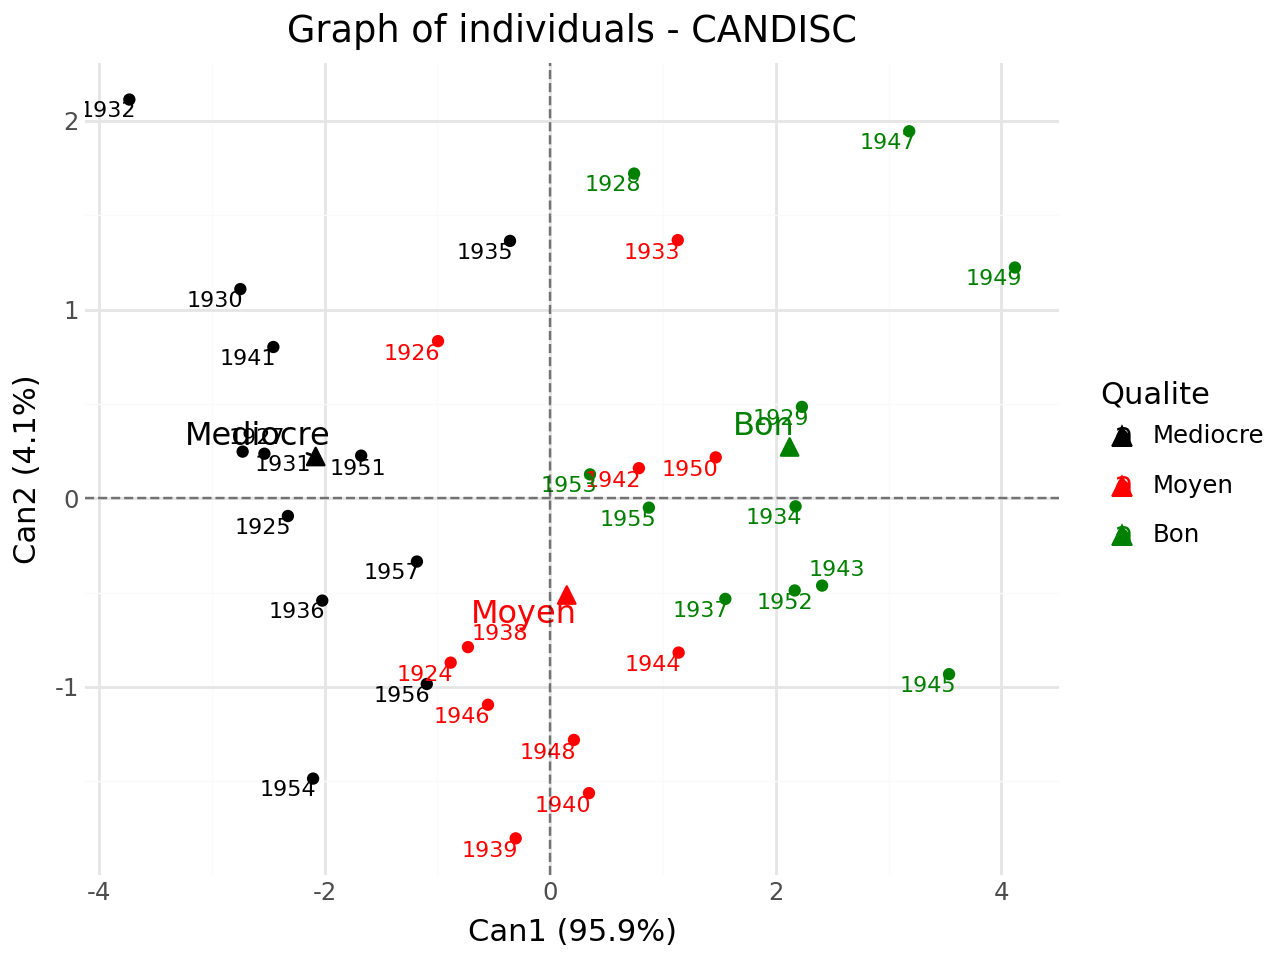

None


In [59]:
#graph of individuals
p = fviz_candisc(clf,element="ind",repel=True)
print(p.show())

We add supplementary individuals to initial plot.

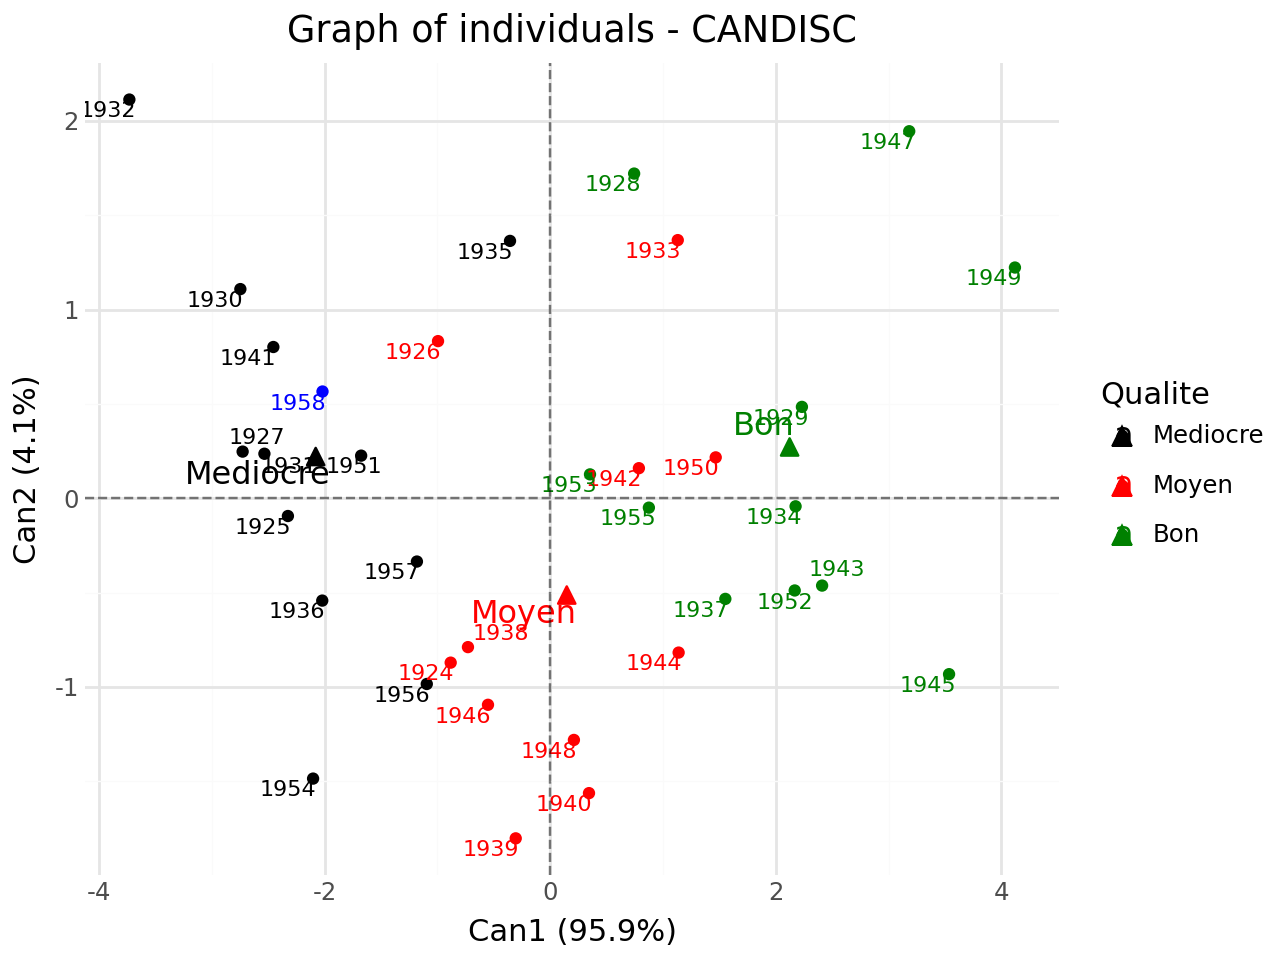

None


In [60]:
#with supplementary individuals
from discrimintools import add_scatter
p = add_scatter(p,clf.transform(XTest),color="blue",repel=True)
print(p.show())

#### Graph of variables

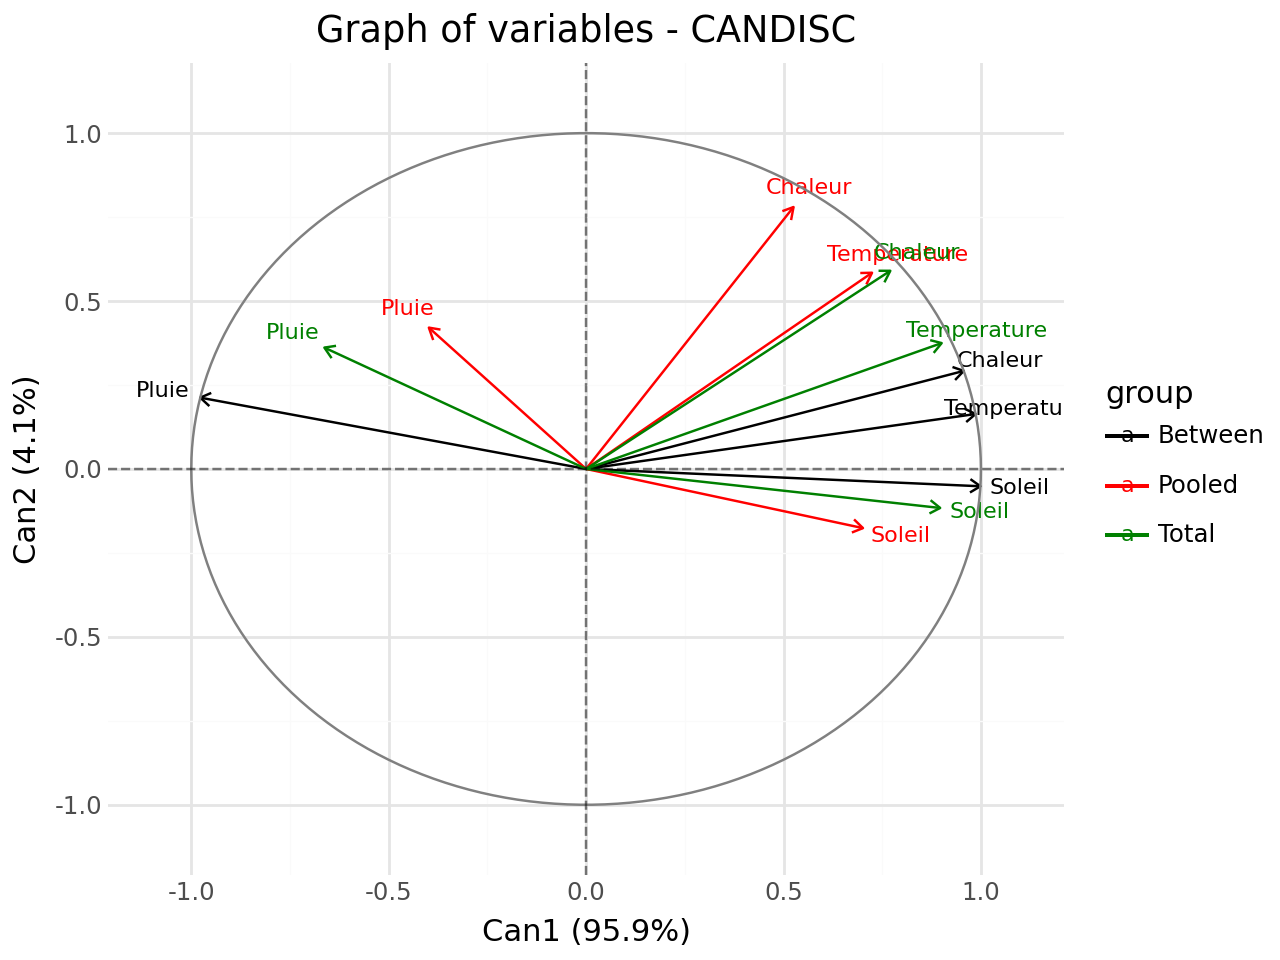

None


In [61]:
#graph of variables
print(fviz_candisc(clf,element="var",repel=True).show())

#### Biplot of individuals and variiables

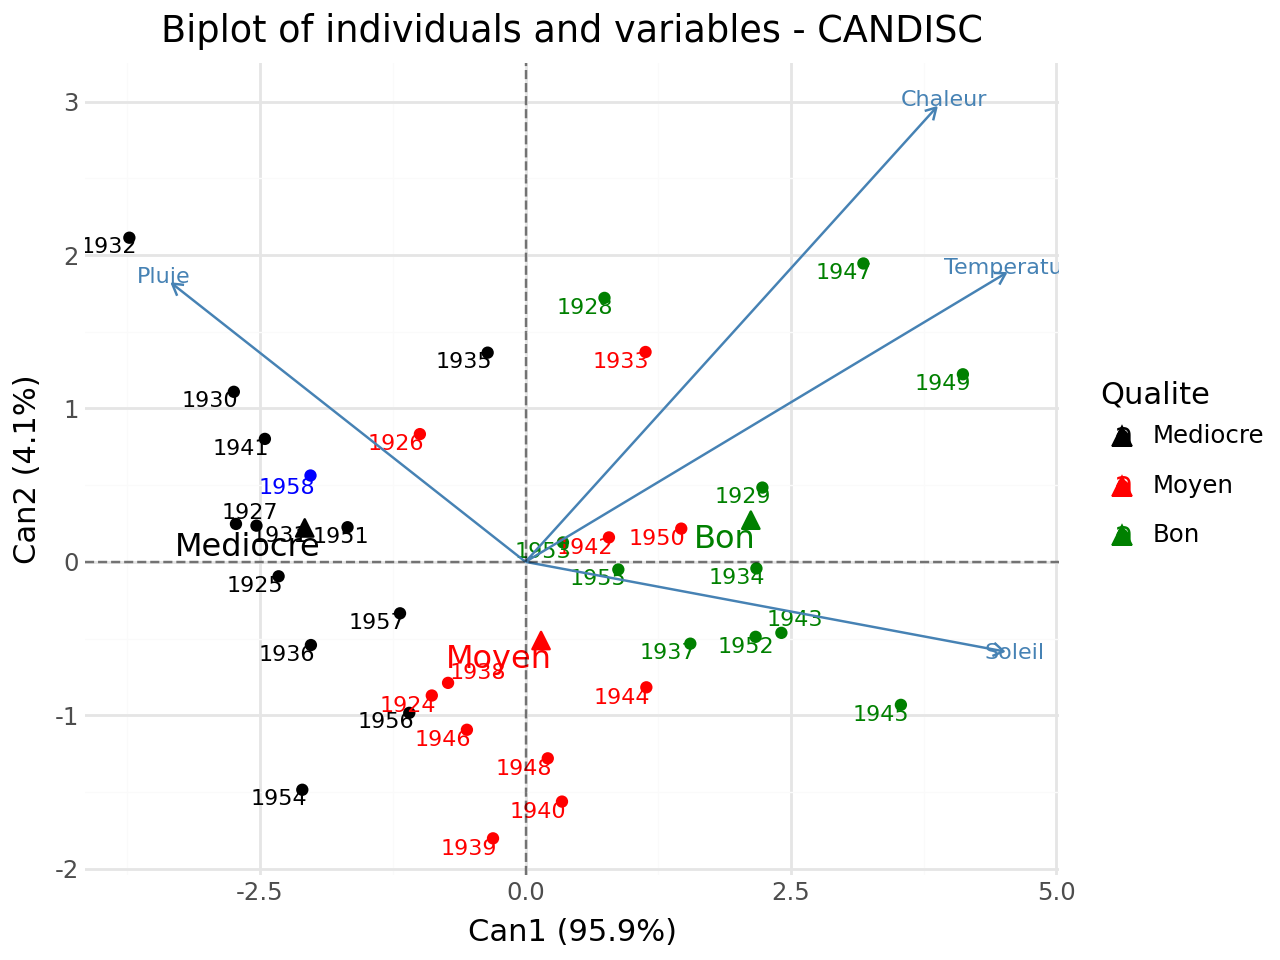

None


In [62]:
#biplot of individuals and variables
p = fviz_candisc(clf,element="biplot",repel=True)
#add supplementary individuals
p = add_scatter(p,clf.transform(XTest),color="blue",repel=True)
print(p.show())

#### Distance between barycenter

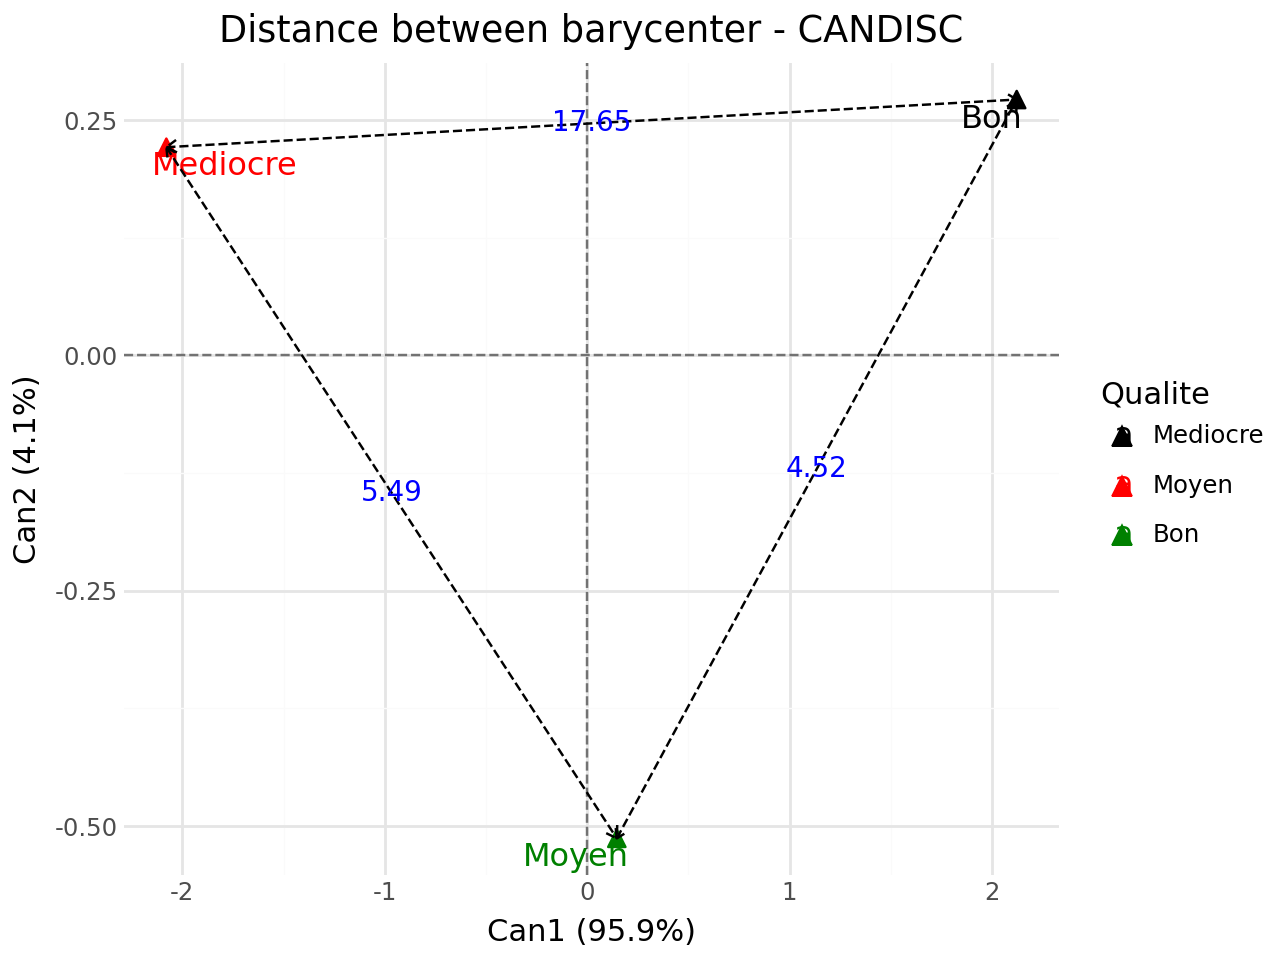

None


In [63]:
#distance between barycenter
print(fviz_candisc(clf,element="dist",repel=True).show())